# 0.) Import and Clean data

In [28]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [30]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [31]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/Country-data.csv", sep = ",")

In [32]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [34]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [35]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [36]:
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_scaled)

# 2.) Plot a Scatter plot of the PCs on the axis

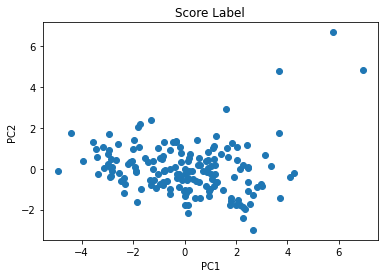

In [37]:
plt.scatter(x=X_pca[:,0],y =X_pca[:,1])
plt.title('Score Label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [38]:
loadings = pca.components_
feature_importance = pd.DataFrame(np.sum(loadings**2, axis=0))

In [39]:
feature_names = df.columns[1:]
feature_importance.index = feature_names
feature_importance.sort_values(0, ascending=False)

,0
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

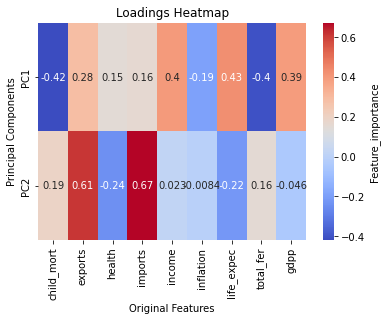

In [40]:
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=["PC1", "PC2"], cbar_kws={'label':'Feature_importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

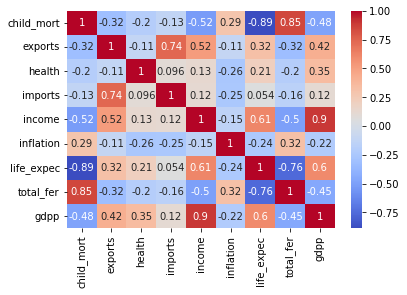

In [41]:
sns.heatmap(X.corr(), cmap="coolwarm", annot=True)
plt.plot()

The variables with the highest positive correlation are income and GDPP, total fertility and child mortality, and imports and exports. The variables with the greatest negative correlation are child mortality and life expectancy, and total fertility and life expectancy. These variables also have similar feature importance in the PCA algorithm.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [42]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

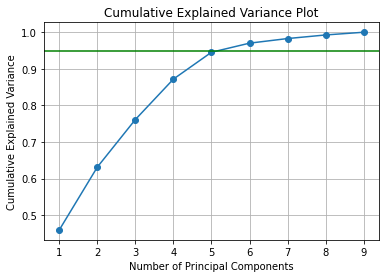

In [43]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.axhline(y=0.95, color="g")
plt.grid()
plt.show()

We should use 5 PCs to retain 95% of the variance.